# **Scintillators**

This code shows the calculation of the sensitivity curve for the Scintillators performed during the high energy week (06-11 / 04 / 2024). 

## **TOTAL ATENUATION**

In [1]:
#WE FIRST LOAD THE PACKAGES NEEDED FOR THE WHOLE PROJECT, THESE BEING NUMPY AND MATPLOTLIB

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot') # ESTE ES UN ESTILO PARA TODAS LAS GRÁFICAS

[  50.   60.   80.  100.  150.  200.  300.  400.  500.  600.  800. 1000.]
[12.87     7.921    3.677    2.035    0.7291   0.3805   0.1818   0.1237
  0.09809  0.08374  0.0677   0.05848]


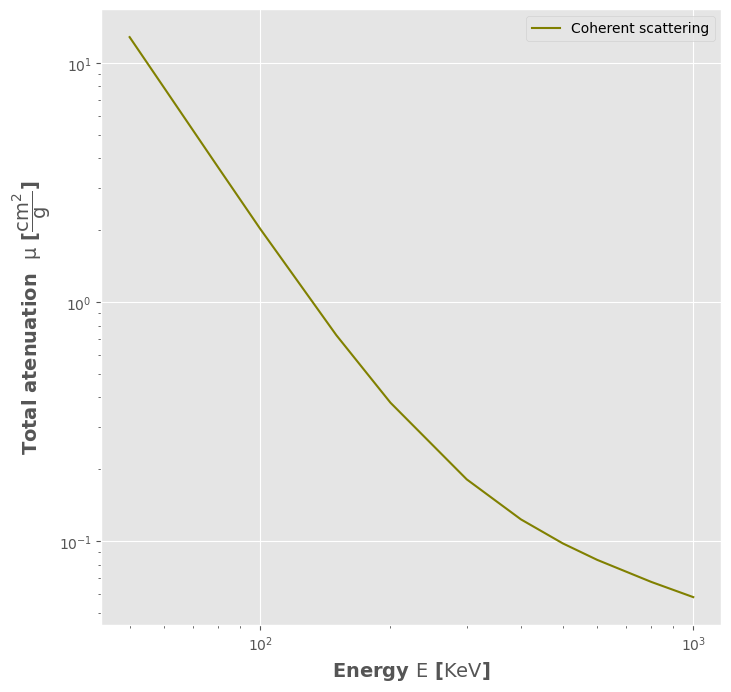

In [2]:
'''
FIRST WE EXTRACT THE DATA (FOR THE COMPOSITION OF OUR DETECTOR), IN THIS CASE FROM THE WEBSITE: 
https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand

THE APPROPRIATE PARAMETERS ARE SELECTED ON THIS WEBSITE: ALL GRAPH OPTIONS, 
ENERGY RANGE: 0.005 - 0.300 KeV (we put 300 for later data extrapolation). 
AS A FINAL STEP WE DOWNLOAD THE DATA
'''

energy, mu = np.loadtxt("CsI_data.txt", unpack="True", skiprows=2, usecols=(0,6)) #WE EXTRACT THE NECESSARY DATA FROM THE ENERGY AND ATTENUATION COEFFICIENT COLUMNS 


#THE NEXT STEP IS TO CHANGE UNITS: MeV TO KeV

energy=energy*1000

#YOU CAN PRINT BOTH VARIABLES TO SEE THAT EVERYTHING IS CORRECT.

print(energy)  
print(mu)

#WE PLOT THE DATA ON A GRAPH

plt.figure(figsize=(8,8))
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Total atenuation  $\mathrm{\mu}$ [$\mathrm{\dfrac{cm^{2}}{g}}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy, mu, label='Coherent scattering', color = 'olive') 
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

## **Efficiency**

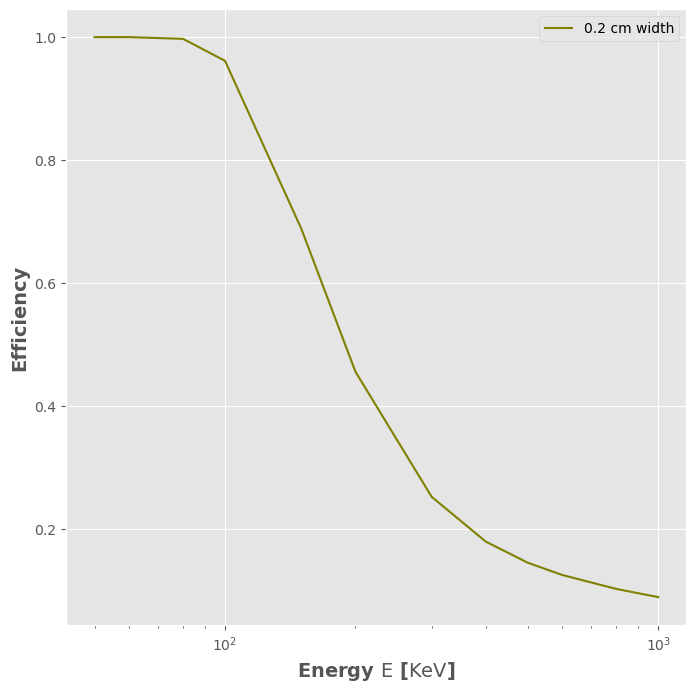

In [3]:
#WE THEN CALCULATE THE EFFICIENCY OF OUR DETECTOR:

#NOW WE CALCULATE THE EFFICIENCY: e(E) = ( 1 - e^{- u * mu} )
#WE CHANGE THE NAME OF THE VARIABLES IN ORDER TO MAKE THEM EASIER TO UNDERSTAND

energy_1 = energy
mu_1 = mu

x = 1.6 #THICKNESS (IN CM) 

efficiency = 1 - np.e**(-x * mu_1) #EFFICIENCY FUNCTION

#REPRESENTING ENERGY EFFICIENCY

plt.figure(figsize=(8,8))
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Efficiency', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, efficiency, label='0.2 cm width', color = 'olive') 
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')

## **Background Noise: Aperture Leakage**

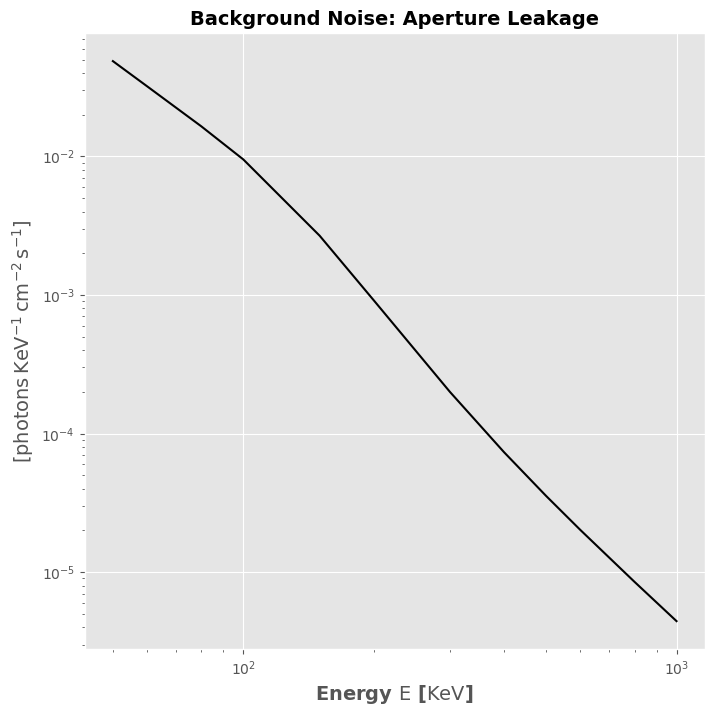

In [4]:
#NOW WE CALCULATE BACKGROUND NOISE: APERTURE LEAKAGE

#FOR THIS STEP, WE NEED THE OMEGA ANGLE 
omega = 4.64878 #THIS IS GIVEN BY OTHER CODE

back_aperture = omega*84.7* efficiency * energy_1**(-2.3)


#WE REPRESENT THE BACK APERTURE AS A FUNCTION OF ENERGY

plt.figure(figsize=(8,8))
plt.title('Background Noise: Aperture Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, back_aperture, color = 'black') 
plt.xscale('log')
plt.yscale('log')

## **Thickness calculation**

In [5]:
'''
para el cálculo del grosor de nuestro detector hay que calcular el grosor de nuestro material que de la misma 
atenuación que el CsI de grosor de 5cm:

mu_CsI * x_CsI = x_material * mu_material

en caso de que hayan varios materiales se debe hacer con todos ellos
Para este caso es de Bi4Ge3012, comunmente conocido como BGO
'''
x_bgo = 2 #cm

energy_CsI, mu_CsI = np.loadtxt("CsI_data.txt", unpack="True", skiprows=2, usecols=(0,6)) #WE EXTRACT THE NECESSARY DATA FROM THE ENERGY AND ATTENUATION COEFFICIENT COLUMNS 

energy_bgo, atenuation_bgo = np.loadtxt('BGO_data.txt', unpack=True, skiprows=2, usecols=(0,6)) 


thickness_BGO = x_bgo * (  atenuation_bgo / mu_CsI )
thickness_BGO = np.median(thickness_BGO)

print(thickness_BGO)

1.0739165506563797


## **Background Noise: Shield Leakage**

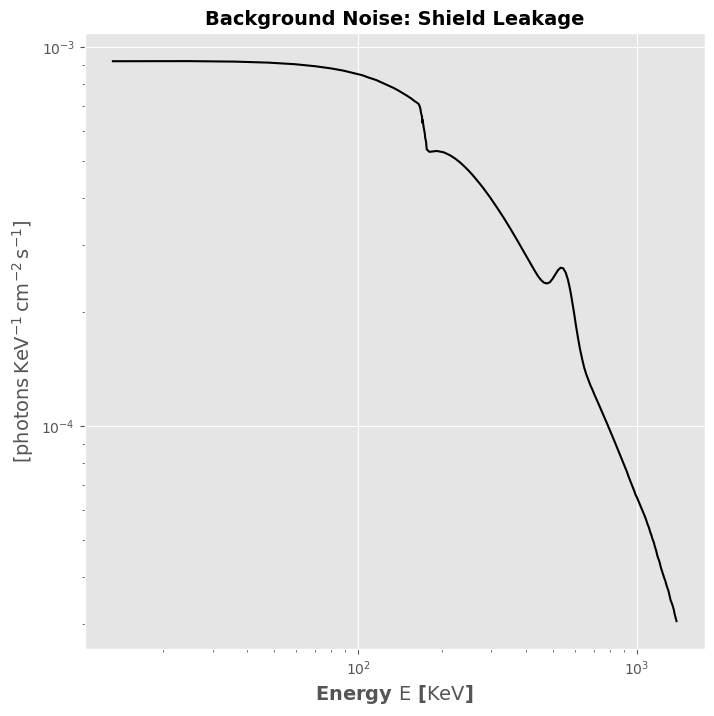

In [6]:
#WE EXTRACT THE NECESSARY DATA FROM THE ENERGY AND background spectrum 

energy2, b_5cm = np.loadtxt('shield_leakage_background_CsI_Tl_5cm.txt', unpack=True) 

#b_5cm is the background spectrum, taken from Figure 8. It refers to a 5 cm thick CsI(Tl) Veto shield.

#NOW WE REPRESENT THE DATA

plt.figure(figsize=(8,8))
plt.title('Background Noise: Shield Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy2, b_5cm , color = 'black') 
plt.xscale('log')
plt.yscale('log')

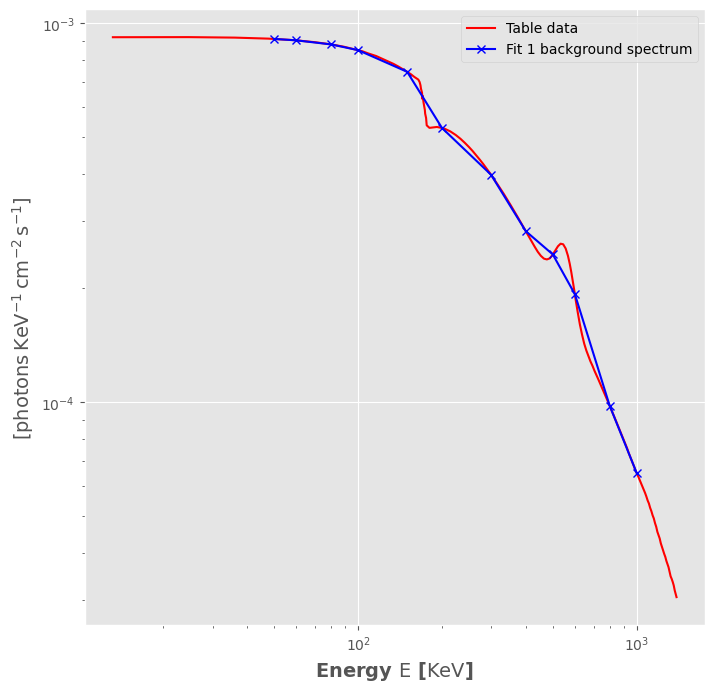

In [7]:
'''
TO MAKE A COMBINATION WITH THE DATA FOUND ABOVE, THE BACKGROUND HAS TO BE CALCULATED FOR THE 
ENERGY VALUES OF THE PRINCIPLE. FOR THIS WE MAKE USE OF THE INTERPOLATION.

'''

interval_x = energy_1
interval_y = np.interp(interval_x, energy2, b_5cm)

energy_2_modified = interval_x
b_5cm_modified = interval_y


#NOW WE PLOT THE DATA ON A GRAPH


plt.figure(figsize=(8,8))
plt.plot(energy2, b_5cm, 'r-', label='Table data')
plt.plot(interval_x, interval_y, 'bx-', label='Fit 1 background spectrum')
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')


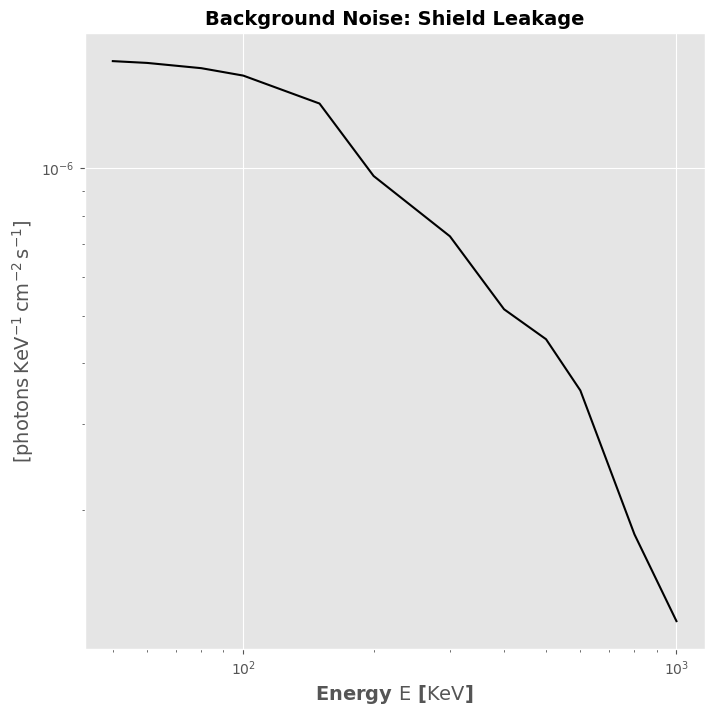

In [8]:
#WE NOW CALCULATE THE TOTAL CONTRIBUTION, USING THE EXPRESSION:

# B_{I} = e^{1- (x/5)} * 10^{-3} * B_{PH5CM}(E)

#THE FACTOR 10^{-3} IS DUE TO THE UNITS IN THE TABLE. PLEASE SEE COMPENDIUM, PAGE 175
shield = 2 #thickness of the shield in cm 
area_detector =   18000  #area of detector to be used as shield (APPROXIMATE)
component_density = 4.59 #density of the material CsI


sigma_shield = 1.25 #esto es de las presentaciones de pablo (sigma shield thickness)
sigma_area = 825 #cm^2
NaI_density = 3.67

correction_factor = ( (x * area_detector * component_density) / ( sigma_shield  * sigma_area * NaI_density) )

#WE NEED THE CORECTION FACTOR BECAUSE WE DON'T HAVE THIS TABLE FOR OTHER MATERIAL, 
#SO IT IS DERIVED FROM THIS BY A LAW OF PROPORTIONALITY. THIS IS ATTACHED IN THE DRIVE/GITHUB

b_i =   b_5cm_modified * np.e**( 1 - (shield/5)) *10**(-3) 


#WE REPRESENT THE DATA

plt.figure(figsize=(8,8))
plt.title('Background Noise: Shield Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_2_modified , b_i, color = 'black') 
plt.xscale('log')
plt.yscale('log')

## **Background Noise: Neutron and Spallation**

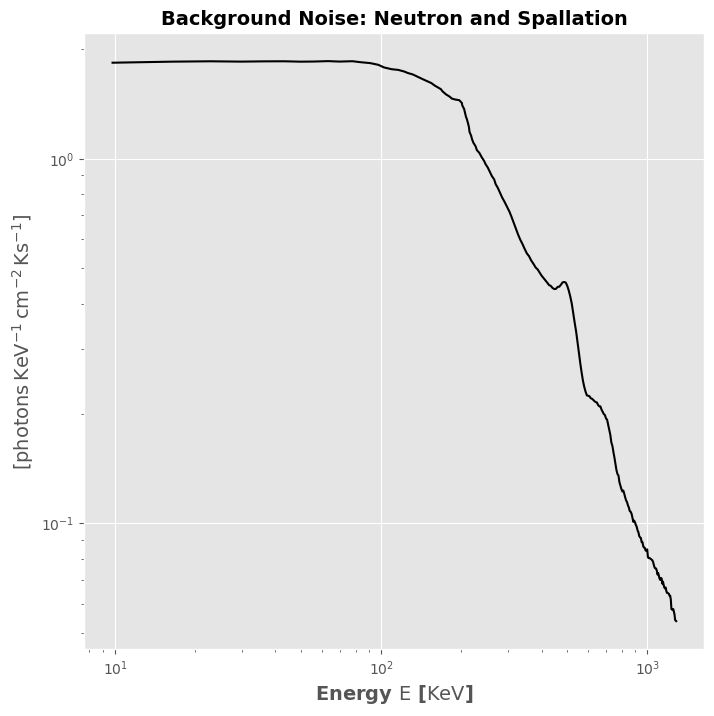

In [9]:
'''
FOR THIS STEP IS THE SAME AS THE PREVIOUS ONE: LOAD THE TABLES AND INTERPOLATE TO OBTAIN THE BACKGROUND VALUE.

'''

energy3, b_fig = np.loadtxt('neutron_spallation_background_NaI_Tl_2cm_4p7GV.txt', unpack=True)
#LATER IT WILL BE MULTIPLIED BY 10^{-3} BECAUSE IT IS IN KILOSECONDS, 
#THAT'S WHY WHEN SWITCHING TO SECONDS THIS FACTOR IS INTRODUCED

#NOW WE REPRESENT THE DATA

plt.figure(figsize=(8,8))
plt.title('Background Noise: Neutron and Spallation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, Ks^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy3, b_fig , color = 'black') 
plt.xscale('log')
plt.yscale('log')

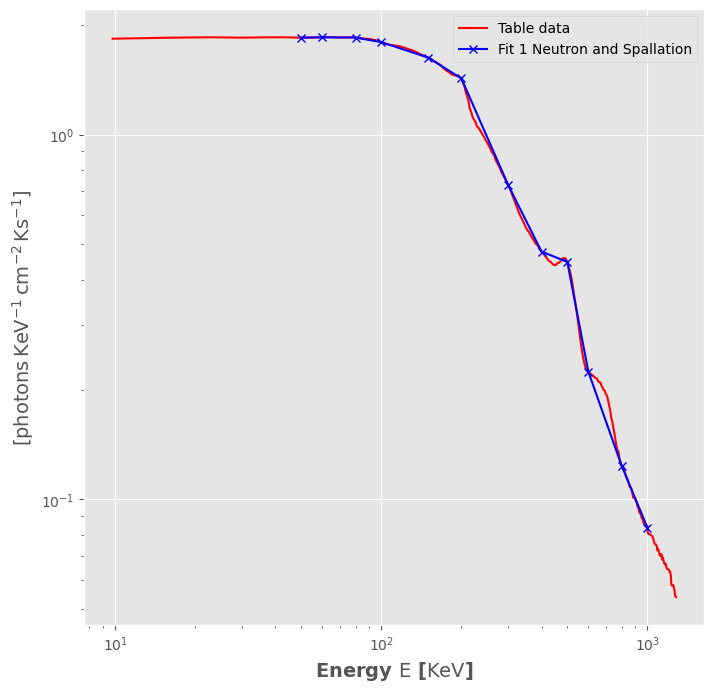

In [10]:

#AS IN THE PREVIOUS STEP, WE PROCEED WITH INTERPOLATION.

interval_x_2 = energy_1
interval_y_2 = np.interp(interval_x_2, energy3, b_fig)

energy_3_modified = interval_x_2
b_fig_modified = interval_y_2


#NOW WE PLOT THE DATA ON A GRAPH


plt.figure(figsize=(8,8))
plt.plot(energy3, b_fig, 'r-', label='Table data')
plt.plot(interval_x_2, interval_y_2, 'bx-', label='Fit 1 Neutron and Spallation')
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, Ks^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')


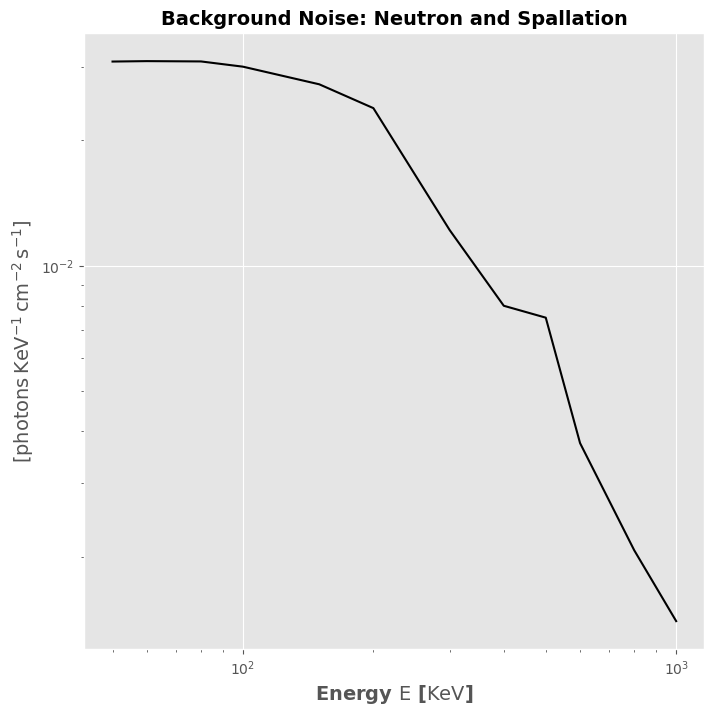

In [11]:
'''
RIGIDITY CORRECTION (if LEO to be calculated with R_C = 15.6 * L^-2, SEE PAGE 174 COMPENDIUM. 
FOR OUR ORBIT: 15.6 * ((1.1)**(-2) ))
NOTE, OUR ORBIT IS ECUATORIAL, SO GEOGRAPHIC SOUTH DEGREE = 0, BUT ON THE GRAPH DOESN'T APPEAR L VALUE FOR THAT, SO WE TAKE 
THE LOWER POSSIBLE
'''
corr_rig = 0.6    
corr_mat = x / 2  # detector material correction
b_ns = corr_rig * corr_mat * b_fig_modified*10**(-3)* correction_factor


plt.figure(figsize=(8,8))
plt.title('Background Noise: Neutron and Spallation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_3_modified, b_ns, color = 'black') 
plt.xscale('log')
plt.yscale('log')


## **ALL CONTRIBUTIONS**

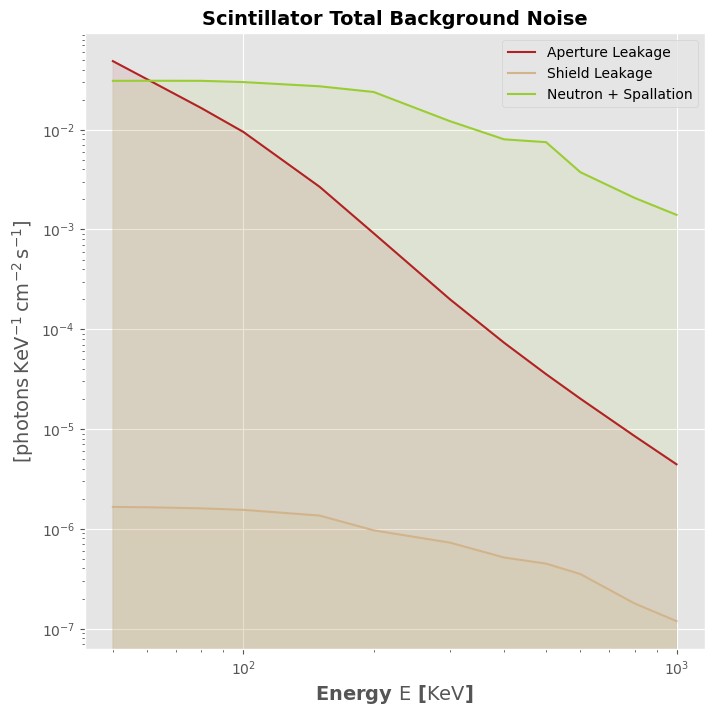

In [12]:
# WE ADD UP ALL THE CONTRIBUTIONS OF THE DIFFERENT EFFECTS TO SEE THE TOTAL RESPONSE.
b_t = b_ns + b_i + back_aperture
plt.figure(figsize=(8,8))
plt.title('Scintillator Total Background Noise', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, back_aperture, label='Aperture Leakage', color = 'firebrick') 
plt.plot(energy_2_modified , b_i, label='Shield Leakage', color = 'tan') 
plt.plot(energy_3_modified, b_ns, label='Neutron + Spallation', color = 'yellowgreen')
#plt.plot(energy_1, b_t, label='all terms', color = 'black')


plt.fill_between(energy_1, back_aperture, color = 'firebrick', alpha=0.1)
plt.fill_between(energy_2_modified , b_i, color = 'tan', alpha=0.1)
plt.fill_between(energy_3_modified, b_ns, color = 'yellowgreen', alpha=0.1)
#plt.fill_between(energy_1, b_ns + b_i + back_aperture, color = 'black', alpha=0.2)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

## **Scintillator Sensitivity curve, T = 2 sec**

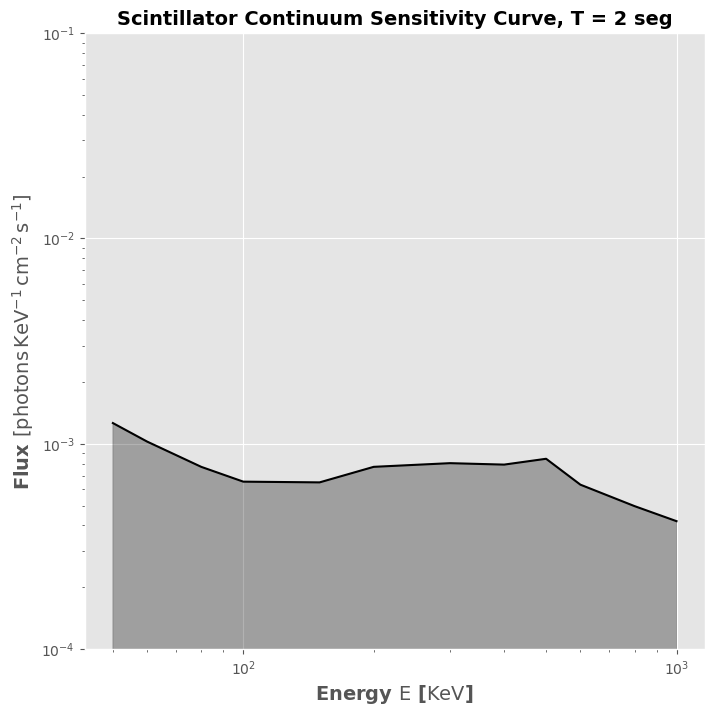

In [13]:
b_t = b_ns + b_i + back_aperture

# FUNCIÓN DE SENSIBILIDAD 
sigma = 3
A = area_detector    # ÁREA DEL SENSOR (CREO)
T_1 = 2
f_min = (sigma / efficiency) * np.sqrt( (4 * b_t) / (A * T_1 * energy_1) )


plt.figure(figsize=(8,8))
plt.title('Scintillator Continuum Sensitivity Curve, T = 2 seg', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Flux $\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, f_min, 'black')
plt.fill_between(energy_1, f_min, color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 1e-1)

plt.show()

## **Scintillator Sensitivity curve, T = 2732 sec**

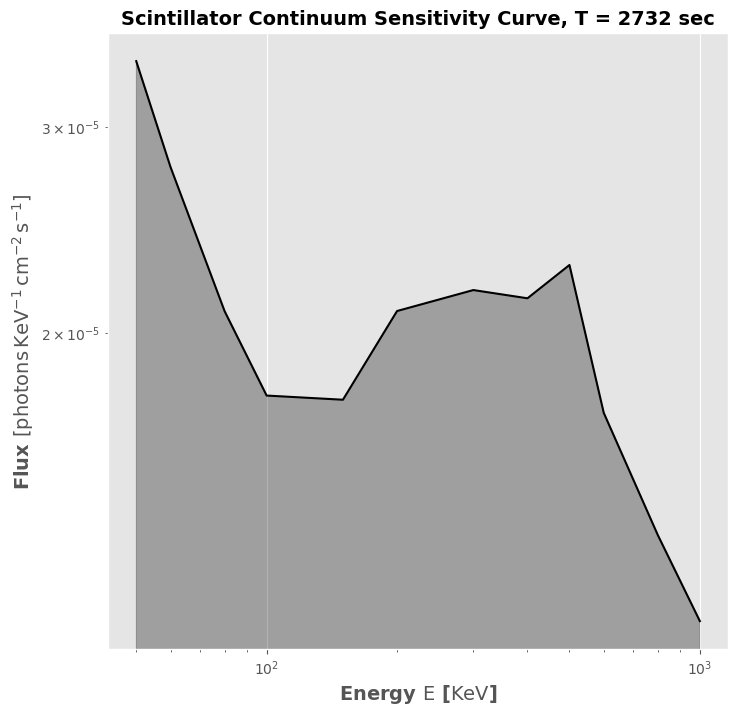

In [14]:
# FUNCIÓN DE SENSIBILIDAD 

T_2 = 2732
f_min_20_seg = (sigma / efficiency) * np.sqrt( (4 * b_t) / (A * T_2 * energy_1) )


plt.figure(figsize=(8,8))
plt.title('Scintillator Continuum Sensitivity Curve, T = 2732 sec', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Flux $\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, f_min_20_seg, 'black')
plt.fill_between(energy_1, f_min_20_seg, color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')

plt.show()

## **Scintillator Sensitivity curve, T = $10^{5}$ sec**

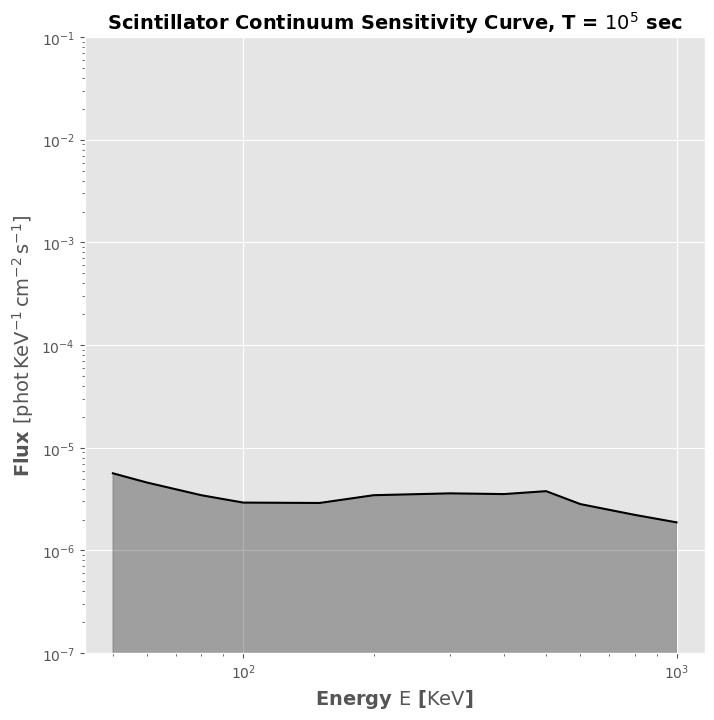

In [15]:
# FUNCIÓN DE SENSIBILIDAD 

T_3 = 1e5
f_min_105seg = (sigma / efficiency) * np.sqrt( (4 * b_t) / (A * T_3 * energy_1) )

plt.figure(figsize=(8,8))
plt.title('Scintillator Continuum Sensitivity Curve, T = $10^{5}$ sec', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, f_min_105seg, 'black')
plt.fill_between(energy_1, f_min_105seg, color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-7, 1e-1)
plt.show()

## **Scintillator Combination Sensitivity curve, T = 1 and 20 sec**

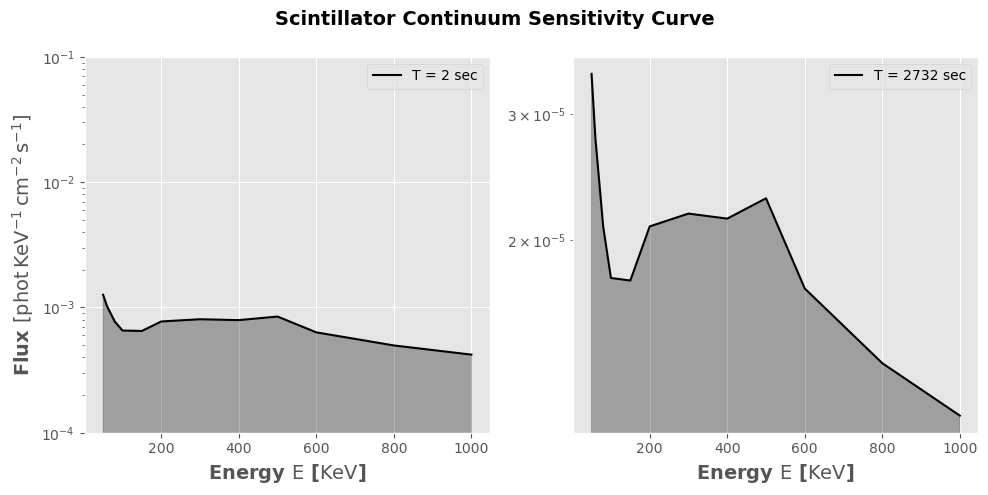

In [16]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Scintillator Continuum Sensitivity Curve', fontsize=14, fontweight='bold')

ax1.plot(energy_1, f_min, 'black', label = 'T = 2 sec')
ax1.fill_between(energy_1, f_min, color='black', alpha=0.3)
ax1.set_yscale('log')
ax1.set_ylim(1e-4, 1e-1)
ax1.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax1.set_ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontsize=14, fontweight='bold')
ax1.legend(loc='best')

ax2.plot(energy_1, f_min_20_seg, 'black', label = 'T = 2732 sec')
ax2.fill_between(energy_1, f_min_20_seg, color='black', alpha=0.3)
ax2.set_yscale('log')
ax2.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax2.legend(loc='best')

plt.tight_layout()

plt.show()

## **Combination Sensitivity curve (Detector + Scintillator), T = 1 and 20 sec**

In [17]:


import pandas as pd

data_detector_1sec_dataframe = pd.read_csv('data_detector_1sec.csv')

print(data_detector_1sec_dataframe.head())

energy_detector = data_detector_1sec_dataframe['Energy']
flux_detector_1_seg = data_detector_1sec_dataframe['Flux']

###################################################################################

data_detector_20sec_dataframe = pd.read_csv('data_detector_20sec.csv')

print(data_detector_20sec_dataframe.head())

energy_detector = data_detector_20sec_dataframe['Energy']
flux_detector_20_seg = data_detector_20sec_dataframe['Flux']


     Energy      Flux
0  5.000000  0.044088
1  5.306122  0.039970
2  5.612245  0.036437
3  5.918367  0.033380
4  6.224490  0.030715
     Energy      Flux
0  5.000000  0.001193
1  5.306122  0.001081
2  5.612245  0.000986
3  5.918367  0.000903
4  6.224490  0.000831


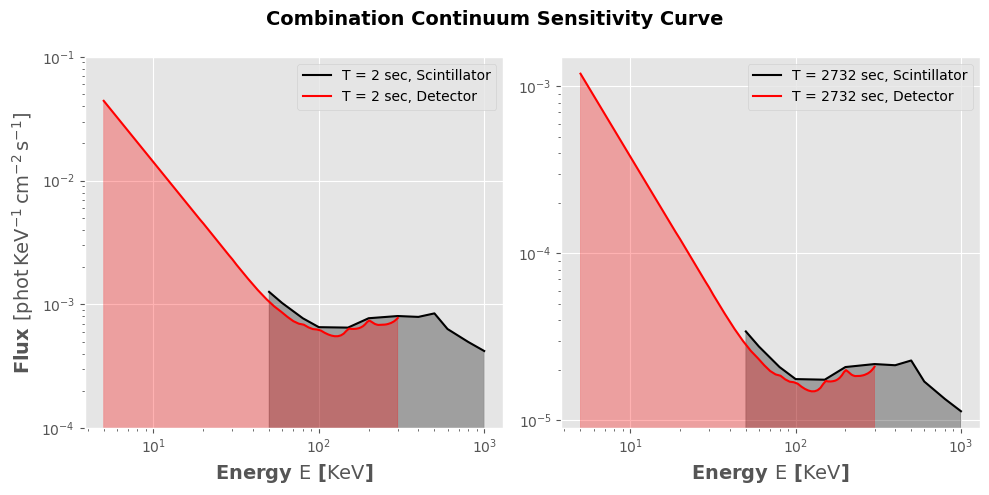

In [18]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Combination Continuum Sensitivity Curve', fontsize=14, fontweight='bold')

ax1.plot(energy_1, f_min, 'black', label = 'T = 2 sec, Scintillator')
ax1.fill_between(energy_1, f_min, color='black', alpha=0.3)
ax1.plot(energy_detector, flux_detector_1_seg, 'red', label = 'T = 2 sec, Detector')
ax1.fill_between(energy_detector, flux_detector_1_seg, color='red', alpha=0.3)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(1e-4, 1e-1)
ax1.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax1.set_ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontsize=14, fontweight='bold')
ax1.legend(loc='best')

ax2.plot(energy_1, f_min_20_seg, 'black', label = 'T = 2732 sec, Scintillator')
ax2.fill_between(energy_1, f_min_20_seg, color='black', alpha=0.3)
ax2.plot(energy_detector, flux_detector_20_seg, 'red', label = 'T = 2732 sec, Detector')
ax2.fill_between(energy_detector, flux_detector_20_seg, color='red', alpha=0.3)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax2.legend(loc='best')

plt.tight_layout()

plt.show()


## **Combination Sensitivity curve (Detector + Scintillator), T = $10^5$ sec**

     Energy      Flux
0  5.000000  0.000197
1  5.306122  0.000179
2  5.612245  0.000163
3  5.918367  0.000149
4  6.224490  0.000137


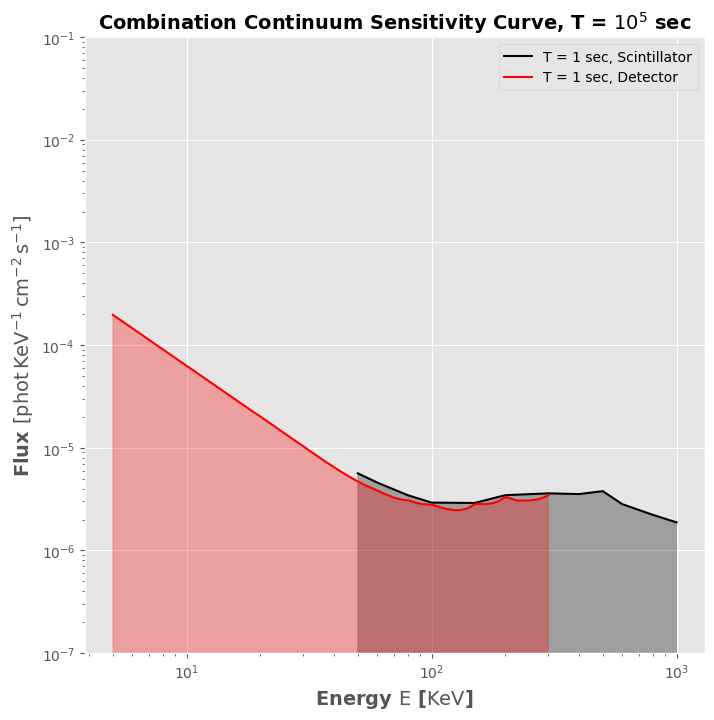

In [19]:
data_detector_1e5sec_dataframe = pd.read_csv('data_detector_1e5sec.csv')

print(data_detector_1e5sec_dataframe.head())

energy_detector = data_detector_1e5sec_dataframe['Energy']
flux_detector_10e5_seg = data_detector_1e5sec_dataframe['Flux']


plt.figure(figsize=(8,8))
plt.title('Combination Continuum Sensitivity Curve, T = $10^{5}$ sec', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, f_min_105seg, 'black', label = 'T = 1 sec, Scintillator')
plt.fill_between(energy_1, f_min_105seg, color='black', alpha=0.3)
plt.plot(energy_detector, flux_detector_10e5_seg, 'red', label = 'T = 1 sec, Detector')
plt.fill_between(energy_detector, flux_detector_10e5_seg, color='red', alpha=0.3)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-7, 1e-1)
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
plt.ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontsize=14, fontweight='bold')
plt.legend(loc='best')


## **Crab Nebula Units**

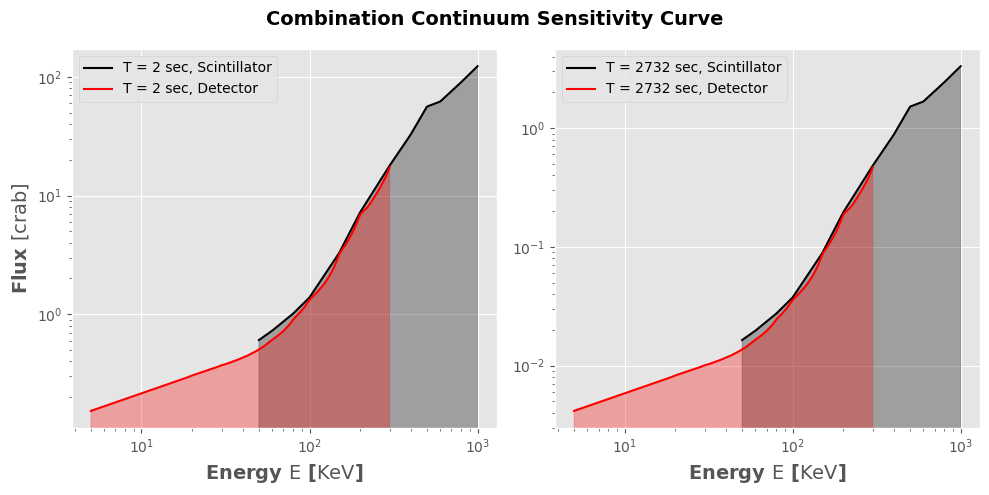

In [20]:
'''
the flux of the crab nebula is given by the expression (compendium):
F_crab = 9 * E^{-2.14}
To convert from our units to units of the nebula we have to divide these 2 quantities

'''
F_crab_detector = 9 * (energy_1**(-2.14))

F_crab_scin = 9 * (energy_detector**(-2.14))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Combination Continuum Sensitivity Curve', fontsize=14, fontweight='bold')

ax1.plot(energy_1, f_min/F_crab_detector, 'black', label = 'T = 2 sec, Scintillator')
ax1.fill_between(energy_1, f_min/F_crab_detector, color='black', alpha=0.3)
ax1.plot(energy_detector, flux_detector_1_seg/F_crab_scin, 'red', label = 'T = 2 sec, Detector')
ax1.fill_between(energy_detector, flux_detector_1_seg/F_crab_scin, color='red', alpha=0.3)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax1.set_ylabel('Flux $\mathrm{[crab]}$', fontsize=14, fontweight='bold')
ax1.legend(loc='best')

ax2.plot(energy_1, f_min_20_seg/F_crab_detector, 'black', label = 'T = 2732 sec, Scintillator')
ax2.fill_between(energy_1, f_min_20_seg/F_crab_detector, color='black', alpha=0.3)
ax2.plot(energy_detector, flux_detector_20_seg/F_crab_scin, 'red', label = 'T = 2732 sec, Detector')
ax2.fill_between(energy_detector, flux_detector_20_seg/F_crab_scin, color='red', alpha=0.3)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax2.legend(loc='best')

plt.tight_layout()

plt.show()

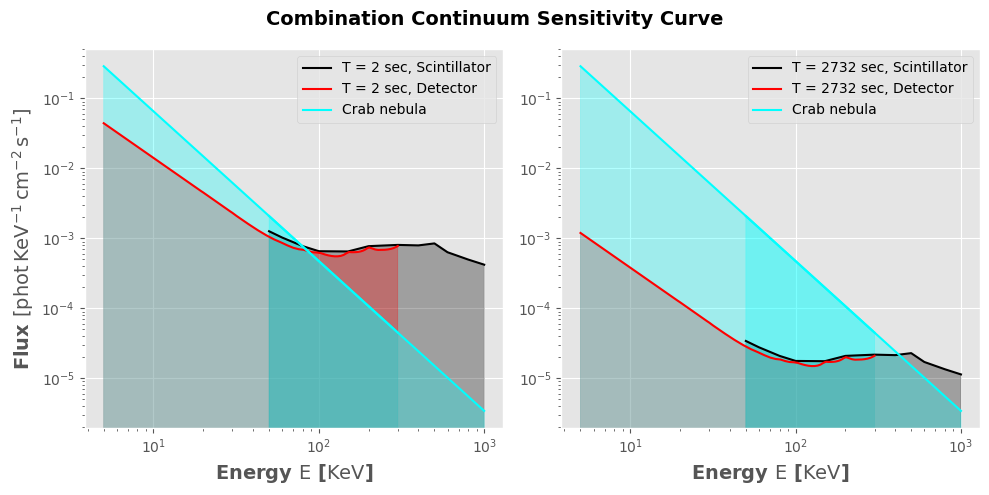

In [21]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Combination Continuum Sensitivity Curve', fontsize=14, fontweight='bold')

ax1.plot(energy_1, f_min, 'black', label = 'T = 2 sec, Scintillator')
ax1.fill_between(energy_1, f_min, color='black', alpha=0.3)
ax1.plot(energy_detector, flux_detector_1_seg, 'red', label = 'T = 2 sec, Detector')
ax1.fill_between(energy_detector, flux_detector_1_seg, color='red', alpha=0.3)


ax1.plot(energy_1, F_crab_detector, 'cyan', label = 'Crab nebula')
ax1.fill_between(energy_1, F_crab_detector, color='cyan', alpha=0.3)
ax1.plot(energy_detector, F_crab_scin, 'cyan')
ax1.fill_between(energy_detector, F_crab_scin, color='cyan', alpha=0.3)



ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax1.set_ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontsize=14, fontweight='bold')
ax1.legend(loc='best')

ax2.plot(energy_1, f_min_20_seg, 'black', label = 'T = 2732 sec, Scintillator')
ax2.fill_between(energy_1, f_min_20_seg, color='black', alpha=0.3)
ax2.plot(energy_detector, flux_detector_20_seg, 'red', label = 'T = 2732 sec, Detector')
ax2.fill_between(energy_detector, flux_detector_20_seg, color='red', alpha=0.3)


ax2.plot(energy_1, F_crab_detector, 'cyan', label = 'Crab nebula')
ax2.fill_between(energy_1, F_crab_detector, color='cyan', alpha=0.3)
ax2.plot(energy_detector, F_crab_scin, 'cyan')
ax2.fill_between(energy_detector, F_crab_scin, color='cyan', alpha=0.3)



ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax2.legend(loc='best')

plt.tight_layout()

plt.show()

  GRB_name  F [phot/cm^2/s/keV]
0   060123             0.000046
1   050906             0.003186
2  130603B             0.479495
3  200829A             0.535808
           E  F [phot/cm^2/s/keV]
0  15.000000             0.028730
1  16.141414             0.025030
2  17.282828             0.022013
3  18.424242             0.019519
4  19.565657             0.017433
           E  F [phot/cm^2/s/keV]
0  15.000000             0.001525
1  24.949495             0.000257
2  34.898990             0.000079
3  44.848485             0.000033
4  54.797980             0.000016
  GRB_name  F [phot/cm^2/s/keV]
0   060123             0.000046
1   050906             0.003186
2  130603B             0.479495
3  200829A             0.535808


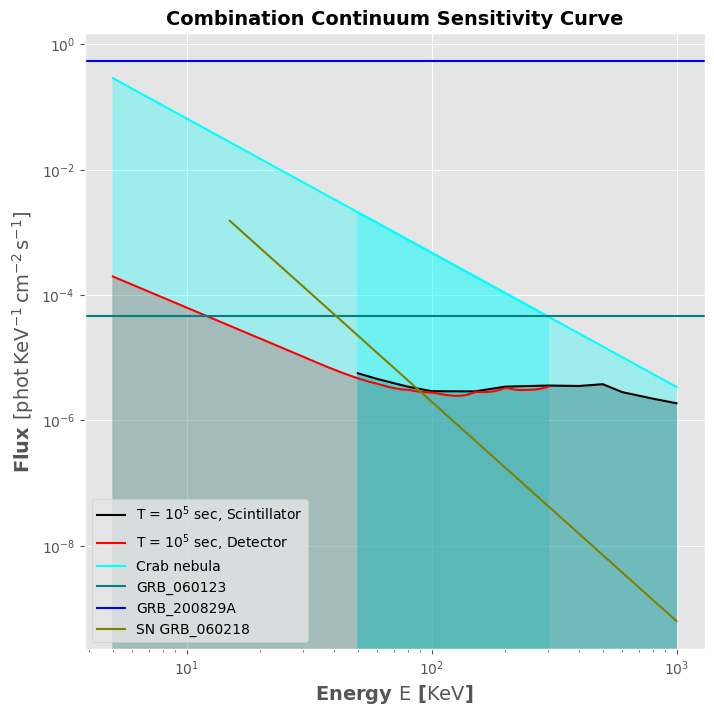

In [22]:
import pandas as pd

minmax_dataframe = pd.read_csv('minmax_GRBs.csv')

print(minmax_dataframe.head())

GRBs_name = minmax_dataframe['GRB_name']
Flux = minmax_dataframe['F [phot/cm^2/s/keV]']
#primera y ultima son long

#################################################################################################################

SGRB_spectrum_GRB170817A_dataframe = pd.read_csv('SGRB_spectrum_GRB170817A.csv')

print(SGRB_spectrum_GRB170817A_dataframe.head())

energy_GRB170817A = SGRB_spectrum_GRB170817A_dataframe['E']
flux_GRB170817A = SGRB_spectrum_GRB170817A_dataframe['F [phot/cm^2/s/keV]']

##################################################################################################################

LGRB_spectrum_GRB060218_dataframe = pd.read_csv('LGRB_spectrum_GRB060218.csv')

print(LGRB_spectrum_GRB060218_dataframe.head())

energy_GRB060218 = LGRB_spectrum_GRB060218_dataframe['E']
flux_GRB060218 = LGRB_spectrum_GRB060218_dataframe['F [phot/cm^2/s/keV]']

minmax_dataframe = pd.read_csv('minmax_GRBs.csv')
energy_GRB060218 = LGRB_spectrum_GRB060218_dataframe['E']

print(minmax_dataframe.head())

GRBs_name = minmax_dataframe['GRB_name']
Flux = minmax_dataframe['F [phot/cm^2/s/keV]']

plt.figure(figsize=(8,8))
plt.title('Combination Continuum Sensitivity Curve', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, f_min_105seg, 'black', label = 'T = $10^{5}$ sec, Scintillator')
plt.fill_between(energy_1, f_min_105seg, color='black', alpha=0.3)
plt.plot(energy_detector, flux_detector_10e5_seg, 'red', label = 'T = $10^{5}$ sec, Detector')
plt.fill_between(energy_detector, flux_detector_10e5_seg, color='red', alpha=0.3)


plt.plot(energy_1, F_crab_detector, 'cyan', label = 'Crab nebula')
plt.fill_between(energy_1, F_crab_detector, color='cyan', alpha=0.3)
plt.plot(energy_detector, F_crab_scin, 'cyan')
plt.fill_between(energy_detector, F_crab_scin, color='cyan', alpha=0.3)

plt.axhline(y=Flux[0], color='teal', label='GRB_060123')
plt.axhline(y=Flux[3], color='blue', label='GRB_200829A')
plt.plot(energy_GRB060218, flux_GRB060218, 'olive', label = 'SN GRB_060218')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(1e-7, 1e-1)
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
plt.ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontsize=14, fontweight='bold')
plt.legend(loc='best')

## **GRBs + Combination Sensitivity curve**

In [23]:
import pandas as pd

minmax_dataframe = pd.read_csv('minmax_GRBs.csv')

print(minmax_dataframe.head())

GRBs_name = minmax_dataframe['GRB_name']
Flux = minmax_dataframe['F [phot/cm^2/s/keV]']
#primera y ultima son long

#################################################################################################################

SGRB_spectrum_GRB170817A_dataframe = pd.read_csv('SGRB_spectrum_GRB170817A.csv')

print(SGRB_spectrum_GRB170817A_dataframe.head())

energy_GRB170817A = SGRB_spectrum_GRB170817A_dataframe['E']
flux_GRB170817A = SGRB_spectrum_GRB170817A_dataframe['F [phot/cm^2/s/keV]']

##################################################################################################################

LGRB_spectrum_GRB060218_dataframe = pd.read_csv('LGRB_spectrum_GRB060218.csv')

print(LGRB_spectrum_GRB060218_dataframe.head())

energy_GRB060218 = LGRB_spectrum_GRB060218_dataframe['E']
flux_GRB060218 = LGRB_spectrum_GRB060218_dataframe['F [phot/cm^2/s/keV]']


  GRB_name  F [phot/cm^2/s/keV]
0   060123             0.000046
1   050906             0.003186
2  130603B             0.479495
3  200829A             0.535808
           E  F [phot/cm^2/s/keV]
0  15.000000             0.028730
1  16.141414             0.025030
2  17.282828             0.022013
3  18.424242             0.019519
4  19.565657             0.017433
           E  F [phot/cm^2/s/keV]
0  15.000000             0.001525
1  24.949495             0.000257
2  34.898990             0.000079
3  44.848485             0.000033
4  54.797980             0.000016


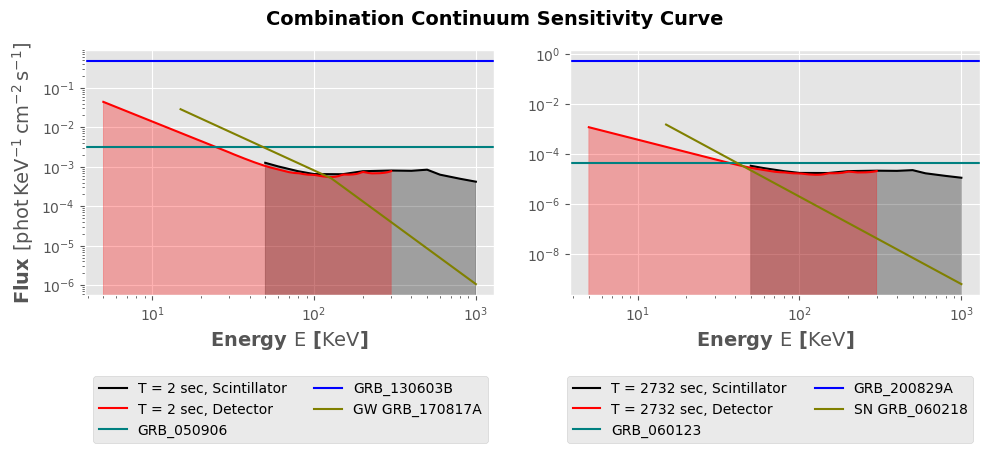

In [25]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Combination Continuum Sensitivity Curve', fontsize=14, fontweight='bold')

ax1.plot(energy_1, f_min, 'black', label = 'T = 2 sec, Scintillator')
ax1.fill_between(energy_1, f_min, color='black', alpha=0.3)
ax1.plot(energy_detector, flux_detector_1_seg, 'red', label = 'T = 2 sec, Detector')
ax1.fill_between(energy_detector, flux_detector_1_seg, color='red', alpha=0.3)
ax1.axhline(y=Flux[1], color='teal', label='GRB_050906')
ax1.axhline(y=Flux[2], color='blue', label='GRB_130603B')
ax1.plot(energy_GRB170817A, flux_GRB170817A, 'olive', label = 'GW GRB_170817A')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax1.set_ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontsize=14, fontweight='bold')
ax1.legend(loc='best', bbox_to_anchor=[1, -0.3], ncol=2)

ax2.plot(energy_1, f_min_20_seg, 'black', label = 'T = 2732 sec, Scintillator')
ax2.fill_between(energy_1, f_min_20_seg, color='black', alpha=0.3)
ax2.plot(energy_detector, flux_detector_20_seg, 'red', label = 'T = 2732 sec, Detector')
ax2.fill_between(energy_detector, flux_detector_20_seg, color='red', alpha=0.3)
ax2.axhline(y=Flux[0], color='teal', label='GRB_060123')
ax2.axhline(y=Flux[3], color='blue', label='GRB_200829A')
ax2.plot(energy_GRB060218, flux_GRB060218, 'olive', label = 'SN GRB_060218')

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax2.legend(loc='best', bbox_to_anchor=[1, -0.3], ncol=2)


plt.tight_layout()

plt.savefig("temp.png")